# Лабораторная работа №1. Использование нейронных сетей прямого распространения для решения задач квалификации.


## Цель работы
Изучение основ работы с нейронными сетями прямого распространения (FNN) для классификации данных, обучение модели на подготовленном датасете, анализ и оценка полученных результатов.

## Задачи
1.	Ознакомиться с принципом работы сети прямого распространения (FNN) и её применением в задачах классификации.
2.	Подготовить датасет для обучения модели.
3.	Реализовать и обучить нейронную сеть прямого распространения (FNN) с использованием выбранного инструмента (PyTorch, TensorFlow или Keras).
4.	Провести обучение сети на подготовленных данных.
5.	Оценить	точность	работы	модели	и	проанализировать	полученные результаты.
6.	Составить отчет, в котором будет описан процесс работы и выводы.

## Индивидуальное задание
Вариант №3
Используем датасет IMDb Reviews, который состоит из текстовых отзывов о фильмах, помеченных как положительные (positive) или отрицательные (negative). Нужно обучить нейронную сеть для классификации текстов на основе этих данных.

## Ход выполнения работы

Перед тем как загрузить данные и построить модель, нужно импортировать библиотеки, которые будем использовать. С помощью tensorflow.keras.datasets импортируем набор данных IMDB, затем подключаем модуль pad_sequences, который позволяет выравнивать длину отзывов. Далее импортируем класс Sequential, который позволяет создавать модели нейронных сетей поэтапно, добавляя слои последовательно, кроме того, необходимо подключить и сами слои (Embedding, Flatten и Dense). Библиотеку matplotlib.pyplot также необходимо импортировать для визуализации изображений.

При помощи функции imdb.load_data(num_words=100000) загрузим датасет и вернем данные в виде обучающего и тестового набора. Параметр num_words=100000 указывает на ограничение словаря первыми 100000 наиболее частых слов в датасете. В коде данная программа будет выглядеть так:


In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
import matplotlib.pyplot as plt

(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=100000)

Функция pad_sequences применяется к обучающим (x_train) и тестовым (x_test) данным, чтобы привести их к одинаковой длине (300 индексов).

In [ ]:
max_len = 300
train_x = pad_sequences(train_x, maxlen=max_len)
test_x = pad_sequences(test_x, maxlen=max_len)

Затем создается объект модели с использованием класса Sequential и начинают добавляться слои. Параметр input_dim=100000 в слое Embedding задает размерность словаря (количество уникальных слов, которые модель будет обрабатывать), output_dim=128 – размерность вектора встраивания (каждое слово будет представлено вектором длиной 128), а input_length=max_len	устанавливает	максимальную	длину последовательности, которую будет принимать модель.
Слой Flatten() принимает входные данные в многомерном формате преобразует их в одномерный массив. С помощью Dense создаются полносвязные слои, то есть каждый нейрон в этом слое связан с каждым нейроном предыдущего слоя. В скрытых слоях количество нейронов (первый входной параметр) определяет, сколько выходных значений будет сгенерировано этим слоем.  Второй входной параметр — это функция
активации, если входное значение больше 0, выход равен этому значению в ином случае выход равен 0. В выходном слое первый параметр указывает, что модель будет выдавать одно значение, а активация sigmoid используется для преобразования выходного значения в диапазон от 0 до 1.


In [ ]:
model = Sequential([
  Embedding(input_dim=100000, output_dim=128, input_length=max_len),
  Flatten(),
  Dense(32, activation='relu'),
  Dense(16, activation='relu'),
  Dense(1, activation='sigmoid') ])

Следующим шагом выполняется компиляция модели, первый параметр — это алгоритм оптимизации, который используется для обновления весов модели во время обучения. Далее идет функция потерь, которая измеряет, насколько хорошо модель предсказывает бинарные выходные значения (например, 0 или 1). Бинарная кросс-энтропия — это хорошая выборка для задач бинарной классификации. Последний параметр позволяет отслеживать точность модели (доля правильных предсказаний) во время обучения и валидации.
Для обучения модели используется команда .fit(), где train_x — это входные данные для обучения, а train_y — соответствующие метки (целевые значения), которые модель должна обучаться предсказывать. Значение epochs указывает количество полных проходов по всему набору данных во время обучения. Размер пакета (батча) определяет количество примеров, обрабатываемых одновременно в одном шаге обучения. Размер батча 4096 означает, что модель будет обновлять свои веса после обработки 4096 примеров. Параметр validation_split=0.2 – это доля данных, выделяемая для валидации во время обучения (20% данных будут использоваться для валидации, чтобы оценить производительность модели на данных, которые она не видела).


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=12, batch_size=4096, validation_split=0.2)

Epoch 1/12
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.5100 - loss: 0.6939 - val_accuracy: 0.5216 - val_loss: 0.6914
Epoch 2/12
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5834 - loss: 0.6819 - val_accuracy: 0.6292 - val_loss: 0.6730
Epoch 3/12
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7068 - loss: 0.6391 - val_accuracy: 0.6476 - val_loss: 0.6264
Epoch 4/12
5/5 ━━━━━━━━━━━━━━━━━━━━ 35s 6s/step - accuracy: 0.7358 - loss: 0.5705 - val_accuracy: 0.7712 - val_loss: 0.5234
Epoch 5/12
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.8379 - loss: 0.4433 - val_accuracy: 0.8144 - val_loss: 0.4303
Epoch 6/12
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8831 - loss: 0.3201 - val_accuracy: 0.8398 - val_loss: 0.3632
Epoch 7/12
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9161 - loss: 0.2328 - val_accuracy: 0.8464 - val_loss: 0.3508
Epoch 8/12
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9362 - loss: 0.1799 - val_accuracy: 0.8684 - val_loss: 0.3217
Epoch 9/

После обучения нужно проверить, насколько хорошо модель работает на новых данных, которых она раньше не видела. Команда .evaluate() делает следующее: прогоняет тестовые данные через модель; вычисляет ошибку (test_loss) – насколько сильно модель ошибается; вычисляет точность (test_acc) – процент правильных предсказаний. Точность модели на тестовой выборке выводится в формате с двумя знаками после запятой.

In [ ]:
test_loss, test_acc = model.evaluate(test_x, test_y)

print(f"Точность на тестовой выборке: {test_acc:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8586 - loss: 0.3377
Точность на тестовой выборке: 0.86


Проанализировав результаты обучения модели на протяжении 12 эпох, а также ее производительность на тестовом наборе данных, можно сделать следующие выводы:
	К концу 12-й эпохи точность на обучающем наборе достигла 98.93%, а функция потерь снизилась до 0.0577. Это указывает на значительное улучшение в производительности модели.
	По мере обучения валидационная точность модели постепенно увеличивалась, достигнув 86.26% к 12-й эпохе.
	Валидационная функция потерь снизилась с 0.6914 до 0.3345, что подтверждает улучшение качества предсказаний.
	Модель демонстрирует устойчивый рост точности как на обучающем, так и на валидационном наборах.
	Функция потерь как на обучающем, так и на валидационном наборах снижается
	Точность на тестовой выборке достигла 85.86%, то есть, модель хорошо справляется с новыми данными
В заключении постоим график, который отображает изменение точности модели в зависимости от эпохи, а также график функции изменения потерь.


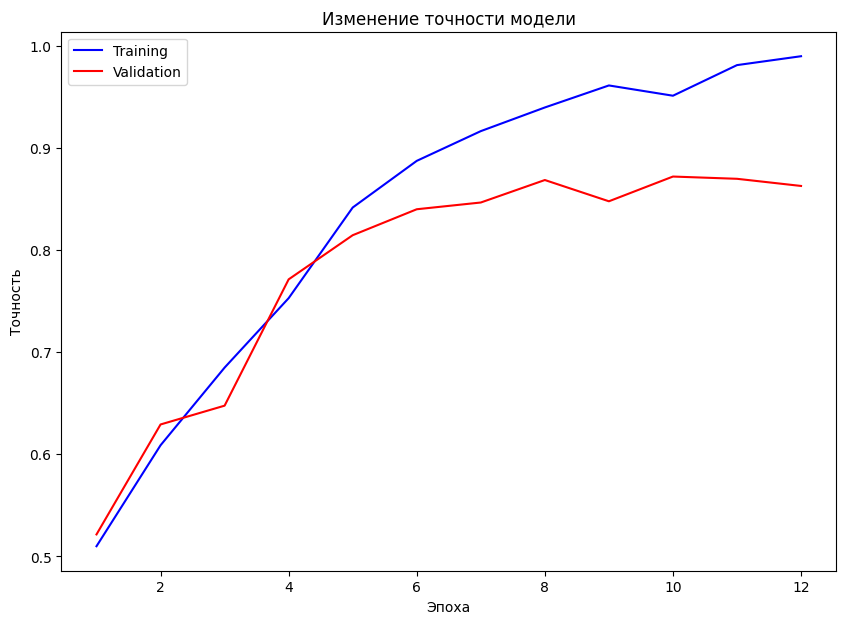

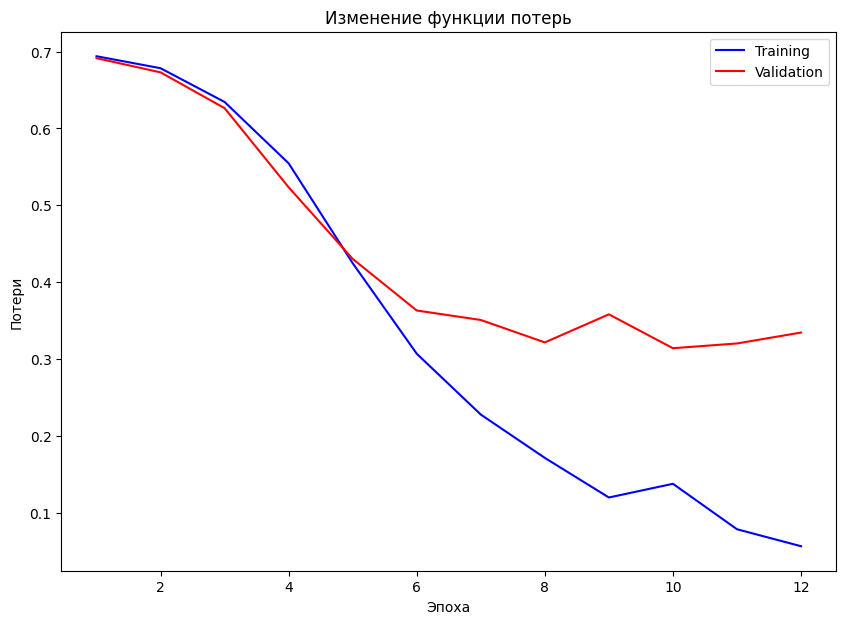

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label='Training', color='blue')
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='Validation', color='red')
plt.title('Изменение точности модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='Training', color='blue')
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='Validation', color='red')
plt.title('Изменение функции потерь')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()


На первом рисунке наблюдается расхождение между точностью модели на обучающей и валидационной выборках, особенно после шестой эпохи, где точность обучения продолжает расти, а валидационная точность снижается. Это может указывать на проблему переобучения.
На втором же обучающая выборка демонстрирует стабильное снижение потерь на протяжении всех эпох, в то же время валидационная выборка показывает небольшой рост потерь после шестой эпохи, что может также указывать на переобучение.



## Вывод
В ходе лабораторной работы были изучены основы работы с нейронными сетями прямого распространения (FNN) для классификации данных, кроме того, было выполнено обучение модели на подготовленном датасете, а также проведен анализ и оценка полученных результатов.
В процессе работы было выявлено расхождение между точностями на обучающей и валидационной выборках, что указывает на возможное переобучение. Значительное уменьшение потерь на обучающей выборке при одновременном росте потерь на валидационной подчеркивает необходимость мониторинга валидационных показателей и применения методов регуляризации для улучшения обобщающих способностей модели.